In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Files/house_prices.csv")

In [3]:
df

,House Size,House Price
0,1500,350000
1,1800,400000
2,2000,450000
3,2200,475000
4,2500,525000
5,2800,575000
6,3000,600000
7,3200,650000
8,3500,700000
9,4000,750000


In [4]:
X = df['House Size']
Y = df['House Price']

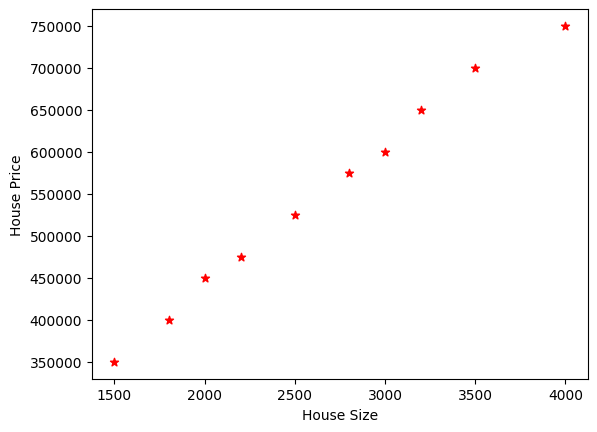

In [5]:
plt.xlabel("House Size")
plt.ylabel("House Price")
plt.scatter(df['House Size'],df['House Price'], color='red', marker='*')

In [6]:
reg = LinearRegression()

In [7]:
reg.fit(df[['House Size']],df[['House Price']])

LinearRegression()

In [8]:
reg.predict([[1500]])

array([[358614.77572559]])

In [9]:
reg.coef_

array([[164.24802111]])

In [10]:
reg.intercept_

array([112242.74406332])

In [11]:
164.24802111 * 2020 + 112242.74406332464

444023.7467055246

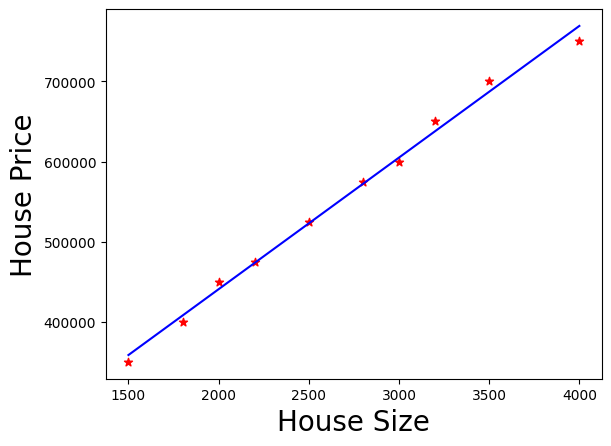

In [12]:
plt.scatter(df['House Size'], df['House Price'], color='red', marker='*')

plt.plot(df['House Size'], reg.predict(df[['House Size']]), color='blue')

plt.xlabel('House Size', fontsize=20)
plt.ylabel('House Price', fontsize=20)

plt.show()

In [13]:
df.describe()

,House Size,House Price
count,10.000000,10.000000
mean,2650.000000,547500.000000
std,794.774601,130942.099163
min,1500.000000,350000.000000
25%,2050.000000,456250.000000
50%,2650.000000,550000.000000
75%,3150.000000,637500.000000
max,4000.000000,750000.000000
